In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data.shape

(200, 4)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


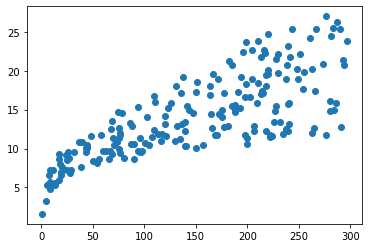

In [6]:
plt.scatter(x=data.TV,y=data.Sales)   #checking the corelation

C:\Users\jijin\AppData\Local\Temp\ipykernel_23040\105058747.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


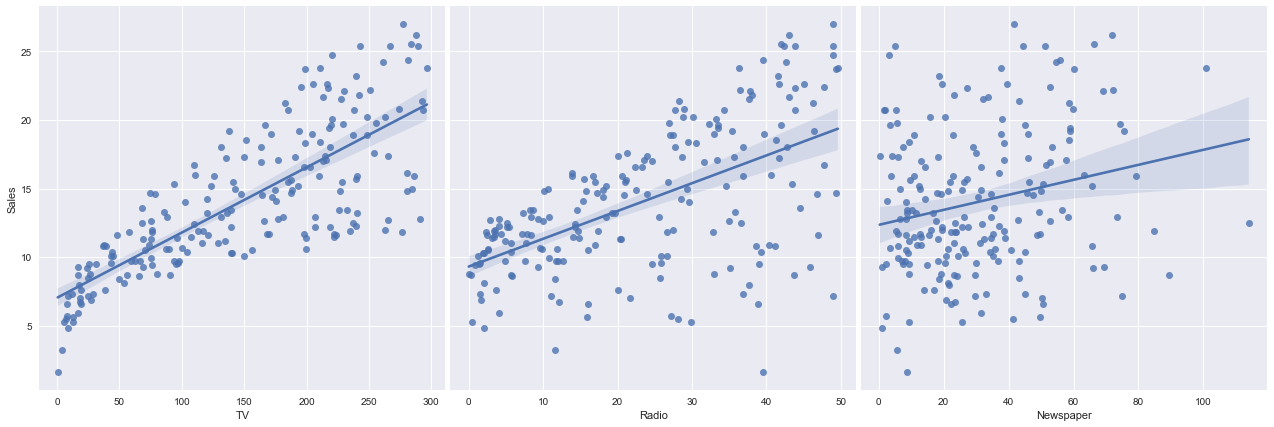

In [7]:
plt.style.use('seaborn')
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=6,aspect=1,kind='reg')

In [8]:
X=data.iloc[:,:3]
y=data.iloc[:,3]

In [9]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [10]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #splitting the data

In [12]:
#apply the linear regression model

#step1:to import the model from sklearn package
from sklearn.linear_model import LinearRegression
#step2:to instantiate the ml model
reg=LinearRegression()
#step3:to fit the training data to the model
reg.fit(X_train,y_train) #optimize the theta value

LinearRegression()

In [13]:
#step4:predict the model
y_pred = reg.predict(X_test)
print(y_pred.shape)
print(y_pred)

(40,)
[11.59269652  4.26191638 12.6234472  21.29785216  8.41428208 12.54349557
  7.2813973  13.09771659 13.73739504  8.07291974  6.6969109   9.63597076
 18.76079332 13.91879744 17.48028606 12.56248919 16.58749148 24.29115082
 23.65825844 12.3544254  15.15790806  7.73195399  4.28504637 12.12017549
 16.41570978 19.00239692 12.30044108  5.90569848 11.94023456 13.61074505
 19.84817553 11.74429017 12.77281513  5.57614792 18.41427383 19.48219509
 10.47039261  8.63340835  7.48856083  9.83452537]


In [14]:
print(reg.coef_)#theta 1,2,3
print(reg.intercept_)#theta 0

[ 0.04656751  0.19367215 -0.00299434]
2.761520614529319


In [15]:
X_sam=X_test.iloc[0,:3].values
wght=np.array(reg.coef_)      #manually taking one value and predicting that value

In [16]:
coeff_mul=X_sam*wght
pred_val=coeff_mul.sum() + reg.intercept_

In [17]:
pred_val   #now we can see that the y_pred first value and the result after calculating pred_val are same           

11.592696517512843

In [18]:
score=r2_score(y_test,y_pred)    #r2score
print(score)

0.9002370149714192


In [19]:
X_train.shape

(160, 3)

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def polyRegression(degree,**kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

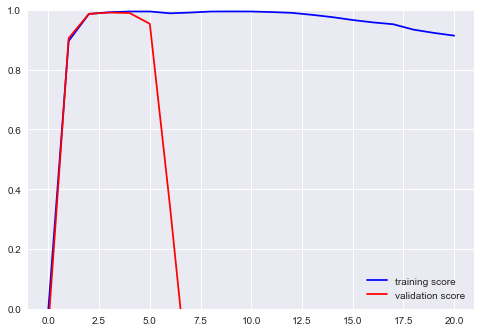

In [22]:
#validation curve is used to find the perfect degree to be applied on the polynomial regression
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(polyRegression(degree), X, y,
                                          param_name='polynomialfeatures__degree',param_range= degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.ylim(0,1)
plt.legend(loc='best') 

In [23]:
poly_model = polyRegression(degree=2) #from above curve we came to know degree 2 is the perfect fit

In [24]:
y_pred = poly_model.fit(X_train, y_train).predict(X_test)


In [25]:
poly_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [27]:
poly_model.coeff_

AttributeError: 'Pipeline' object has no attribute 'coeff_'

In [ ]:
from sklearn.metrics import r2_score #r2score
score=r2_score(y_test,y_pred)
score